# Reto exploración avistamientos de OVNIs

## Importamos las librerías necesarias y leemos el csv



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import GoogleV3


#Leemos el csv
df = pd.read_csv('dat/ufos.csv', encoding = "ISO-8859-1", sep = ',', error_bad_lines=False, dtype='unicode')



## 1. ¿Qué países aparecen en el dataset? ¿Cuál tiene mayor número de avistamientos?
Para averiguar qué países aparecen en el dataset y cuál tiene mayor número de avistamientos agrupamos por la columna country y contamos con count() cuantas veces aparece cada país.
Guardamos el resultado en un nuevo dataframe "df_countries" y lo ordenamos de menor a mayor número de avistamientos. 
#### Vemos que el que mayor número de avistamientos tiene es US - United States.

         avistamientos
country               
US               65114
CA                3000
GB                1905
AU                 538
DE                 105


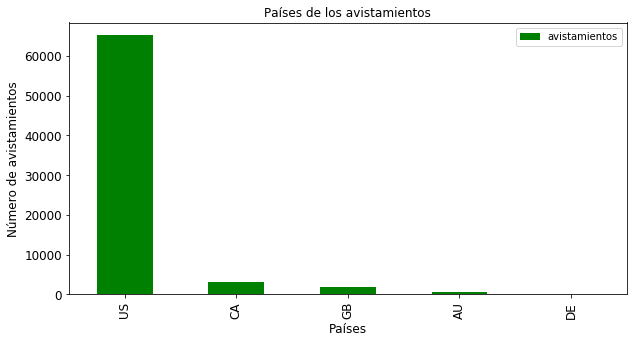

In [16]:
#Agrupamos por la columna country y contamos cuantos avistamientos hay por país
serie_countries = df.groupby(['country'])['country'].count()

#Guardamos el resultado en un nuevo dataframe y lo ordenamos en orden descendente
df_countries = pd.DataFrame()
df_countries['avistamientos'] = serie_countries
df_countries = df_countries.sort_values(by='avistamientos', ascending=False)

#Pasamos las abreviaturas a mayúsculas
df_countries.index = df_countries.index.map(str.upper)

print(df_countries)

#Mostramos los países y su número de avistamientos en un gráfico
ylabel_text = "Número de avistamientos"
a = df_countries['avistamientos'].plot(kind='bar', title = 'Países de los avistamientos', figsize=(10, 5), 
                                color = 'green', legend=True, fontsize=12)
a.set_xlabel("Países", fontsize=12)
a.set_ylabel(ylabel_text, fontsize=12)
plt.show()

## 2. ¿Cuáles son las 10 formas de OVNI avistadas más frecuentes (y cuál es esa frecuencia)?
Para obtener las 10 formas de OVNI más frecuentes agrupamos por la columna shape y contamos con count() cuantas veces aparece cada forma.
Guardamos el resultado en un nuevo dataframe "df_formas".
Para quedarnos con las 10 formas avistadas más frecuentes ordenamos el dataframe en orden descendente y nos quedamos con las 10 primeras filas.
#### Vemos que la forma más frecuente es light (luz).

           avistamientos
shape                   
light              16565
triangle            7865
circle              7608
fireball            6208
other               5649
unknown             5584
sphere              5387
disk                5213
oval                3733
formation           2457


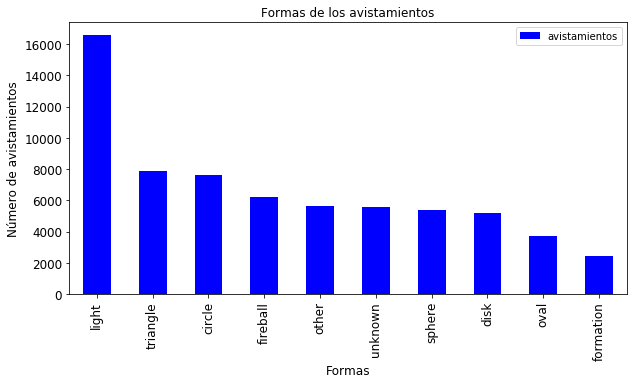

In [17]:
#Agrupamos por la columna shape y contamos los avistamientos de cada forma
serie_formas = df.groupby(['shape'])['shape'].count()

#Guardamos el resultado en un nuevo dataframe, lo ordenamos en orden descendente 
df_formas = pd.DataFrame()
df_formas['avistamientos'] = serie_formas

#y nos quedamos con las 10 primeras filas
df_formas = df_formas.sort_values(by='avistamientos', ascending=False)[:10]

print(df_formas);

#Mostramos los países y su número de avistamientos en un gráfico
ylabel_text = "Número de avistamientos"
b = df_formas['avistamientos'].plot(kind='bar', title = 'Formas de los avistamientos', figsize=(10, 5), 
                                    color = 'blue', legend=True, fontsize=12)
b.set_xlabel("Formas", fontsize=12)
b.set_ylabel(ylabel_text, fontsize=12)
plt.show()


## 3. ¿Cómo se distribuye la duración de los avistamientos? 

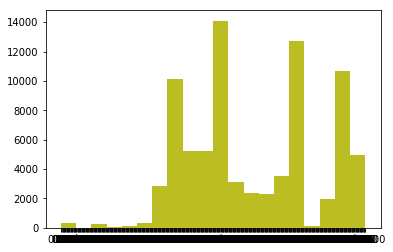

In [48]:
plt.hist(df['duration (seconds)'], bins = 20) 
plt.show()

#print(df['duration (seconds)'])


## 4.¿Cómo se distribuye el tiempo pasado entre el momento del avistamiento (datetime) y la fecha de publicación (date_posted)?

In [47]:
df['date posted'] = df['date posted'].astype(str)
df['datetime'] = df['datetime'].astype(str)

df['date posted'] = pd.to_datetime(df['date posted'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'] , errors='coerce')


df['tiempo_publi'] = df['date posted'] - df['datetime']

df[df['tiempo_publi']< pd.Timedelta(0)] = 0


#df['tiempo_publi'] = df['tiempo_publi'].dt.total_seconds()

print(df['tiempo_publi'])

plt.hist(df['tiempo_publi'], bins = 30) 
plt.show()


#¿Se observa un crecimiento o decrecimiento de los avistamientos a lo largo del tiempo?




0       19922 days 03:30:00
1       20520 days 03:00:00
2       19095 days 07:00:00
3       17264 days 03:00:00
4       15808 days 04:00:00
5       16634 days 05:00:00
6       14736 days 03:00:00
7       12409 days 00:15:00
8       15500 days 04:00:00
9       14092 days 03:00:00
10      12803 days 11:00:00
11      14489 days 05:00:00
12      10805 days 08:00:00
13      13640 days 05:00:00
14      14006 days 03:00:00
15      12027 days 05:00:00
16      12725 days 01:30:00
17      10940 days 05:00:00
18      10319 days 01:00:00
19       9069 days 04:30:00
20      11801 days 02:30:00
21      10880 days 01:00:00
22      11814 days 07:00:00
23      13633 days 03:30:00
24      12115 days 02:00:00
25       9998 days 12:00:00
26       9654 days 02:00:00
27      10340 days 22:00:00
28       9320 days 00:00:00
29       9232 days 02:00:00
                ...        
80302      14 days 04:00:00
80303      14 days 03:50:00
80304      14 days 03:30:00
80305      14 days 03:30:00
80306      14 days 0

TypeError: Cannot cast ufunc less input from dtype('float64') to dtype('<m8[ns]') with casting rule 'same_kind'

## 5 ¿Se observa un crecimiento o decrecimiento de los avistamientos a lo largo del tiempo?
Para saber si ha habido un crecimiento o decrecimiento de avistamientos tratamos los datos para obtenemos dos columnas, una con los años en los que se producen avistamientos y otra con el número de avistamientos por año.
Ordenamos los datos por año en orden descendente y los mostramos en un gráfico.

#### Podemos ver que se produce un crecimiento de los avistamientos a lo largo de los años hasta el año 2012 que se produce el número más alto. A partir de 2012 se observa un decrecimiento.

In [ ]:
#Extraemos el año de la columna datetime y creamos una nueva columna "year"
df['year'] = df['datetime'].dt.year

#Agrupamos el dataframe por la columna year y contamos los avistamientos por año
serie_years = df.groupby(['year'])['year'].count()

#Creamos un nuevo dataframe que contendrá el resultado de agrupar el original
df_years = pd.DataFrame()
df_years['avistamientos'] = serie_years

#Reseteamos el índice para pasar el índice (year) a columna
df_years = df_years.reset_index()

#Ordenamos el dataframe por year en orden descendente
df_years = df_years.sort_values(by='year', ascending=False)

#Mostramos los datos en un gráfico
x = df_years['year']
y = df_years['avistamientos']

plt.xlabel('Años')
plt.ylabel('Total avistamientos')
plt.title('Evolución del número de avistamientos a lo largo del tiempo')
plt.plot(x,y)
plt.show()